# Linear Regression Model

In [ ]:
import yfinance as yf

stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-11-29"

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)
data['Daily_Return'] = data['Adj Close'].pct_change()

data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400,-0.012692
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,-0.026600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,-0.016693
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100,0.000988
...,...,...,...,...,...,...,...
2023-11-21,191.410004,191.520004,189.740005,190.639999,190.639999,38134500,-0.004231
2023-11-22,191.490005,192.929993,190.830002,191.309998,191.309998,39617700,0.003514
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300,-0.007004


In [ ]:
import yfinance as yf
import plotly.graph_objects as go

# Download historical data for Apple for the last 5 years
symbol = 'AAPL'
start_date = '2018-01-01'
end_date = '2023-01-01'
apple_data = yf.download(symbol, start=start_date, end=end_date)

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(x=apple_data.index,
                open=apple_data['Open'],
                high=apple_data['High'],
                low=apple_data['Low'],
                close=apple_data['Close'])])

# Customize the layout
fig.update_layout(
    title=f'Apple ({symbol}) Stock (5 Years)',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    template='plotly_dark'  # You can choose a different template if you prefer
)

# Show the chart
fig.show()

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


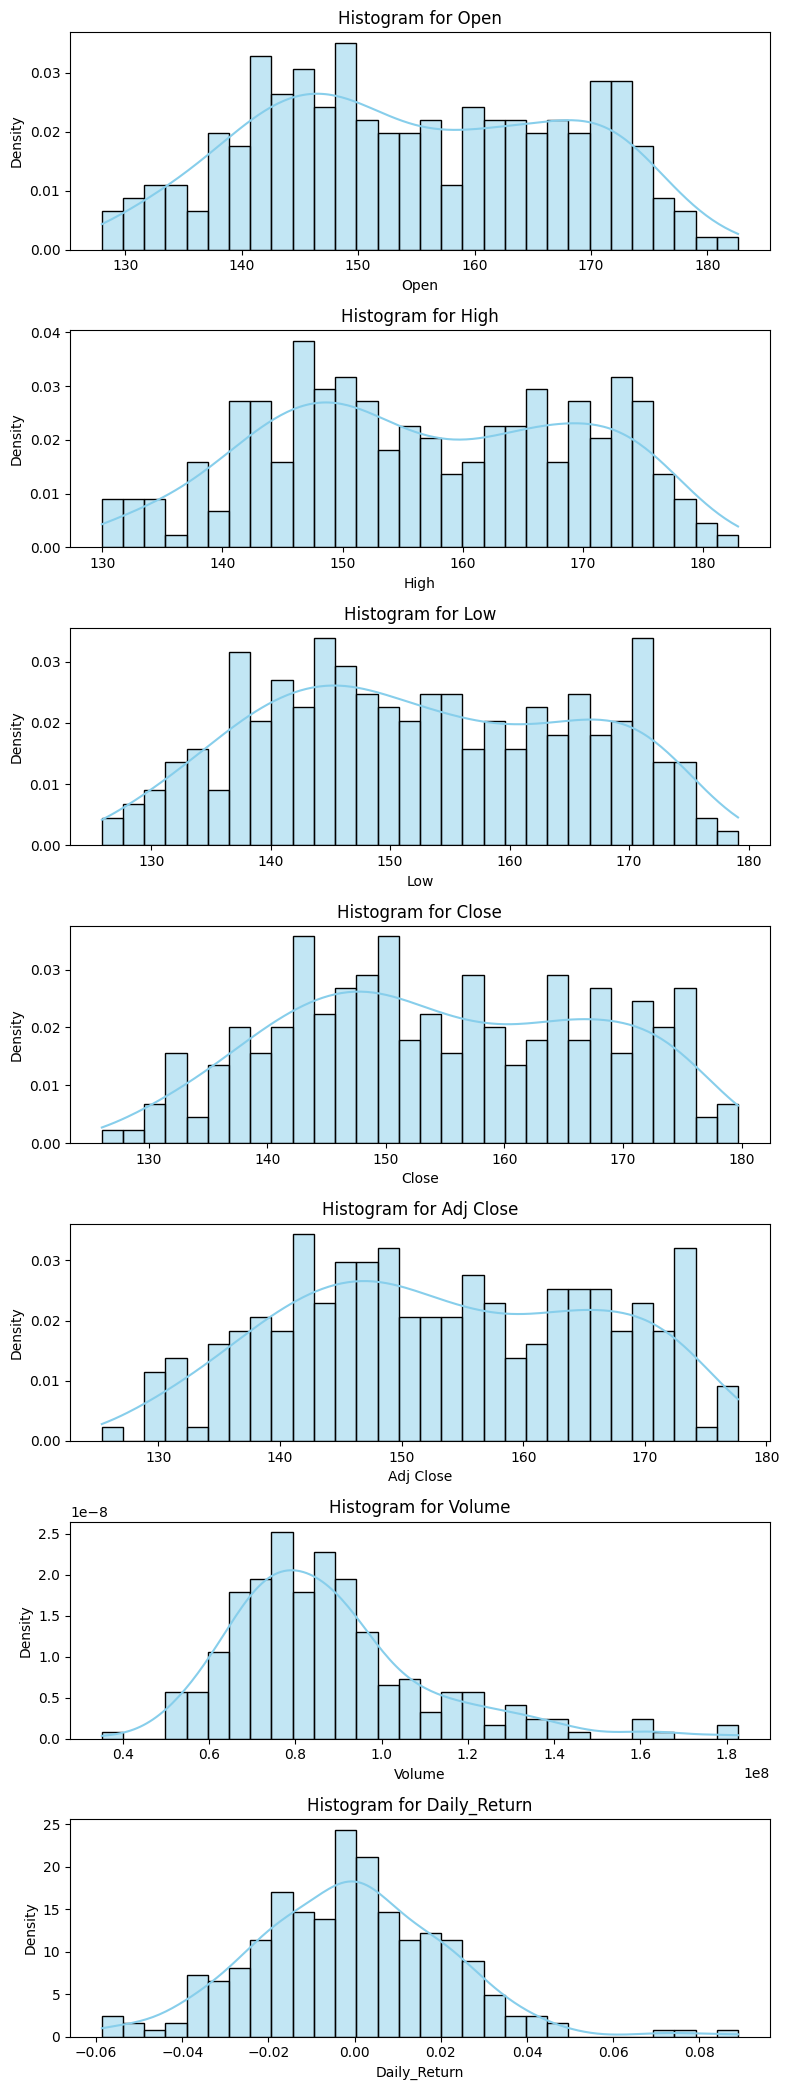

In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock symbol and the date range
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Drop missing values
data = data.dropna()

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(8, 3 * len(data.columns)))

# Create histograms for each variable
for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i], kde=True, bins=30, color='skyblue', stat="density")
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Model For Apple for 5 days

import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the stock symbol and the date range
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Drop missing values
data = data.dropna()

# Define the features and target variable
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Use the model to predict the stock price for the next 5 days
last_date = data.index[-1]
next_dates = pd.date_range(last_date, periods=6, freq='B')[1:]  # Increase periods to 6
next_features = yf.download(stock_symbol, start=last_date, end=next_dates[-1])[['Open', 'High', 'Low', 'Close', 'Volume']]
next_predictions = model.predict(next_features)

# Display the predictions for the next 5 days
next_predictions_df = pd.DataFrame({'Predicted_Adj_Close': next_predictions}, index=next_dates[:-1])  # Use [:-1] to match the length
print('\nPredictions for the next 5 days:')
print(next_predictions_df)

# Evaluate the model
r_squared = model.score(X_test, y_test)
print(f'R-squared value: {r_squared}')

# Use the model to predict the stock price for the next 5 days
last_date = data.index[-1]
next_dates = pd.date_range(last_date, periods=6, freq='B')[1:]
next_features = yf.download(stock_symbol, start=last_date, end=next_dates[-1])[['Open', 'High', 'Low', 'Close', 'Volume']]
next_predictions = model.predict(next_features)

# Display the predictions for the next 5 days
next_predictions_df = pd.DataFrame({'Predicted_Adj_Close': next_predictions}, index=next_dates[:-1])
print('\nPredictions for the next 5 days:')
print(next_predictions_df)

# Compare predicted and actual stock prices
actual_prices = yf.download(stock_symbol, start=last_date, end=next_dates[-1])['Adj Close']
comparison_df = pd.concat([actual_prices, next_predictions_df], axis=1)
comparison_df.columns = ['Actual_Adj_Close', 'Predicted_Adj_Close']

# Display the comparison
print('\nComparison of Actual and Predicted Stock Prices:')
print(comparison_df)


[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 0.04428061468370616
[*********************100%%**********************]  1 of 1 completed

Predictions for the next 5 days:
            Predicted_Adj_Close
2023-01-02           129.200790
2023-01-03           124.325813
2023-01-04           125.647914
2023-01-05           124.361858
R-squared value: 0.9997590561545988
[*********************100%%**********************]  1 of 1 completed

Predictions for the next 5 days:
            Predicted_Adj_Close
2023-01-02           129.200790
2023-01-03           124.325813
2023-01-04           125.647914
2023-01-05           124.361858
[*********************100%%**********************]  1 of 1 completed

Comparison of Actual and Predicted Stock Prices:
            Actual_Adj_Close  Predicted_Adj_Close
2022-12-30        129.207779                  NaN
2023-01-02               NaN           129.200790
2023-01-03        124.374794           124.325813
2023-01-04

[*********************100%%**********************]  1 of 1 completed


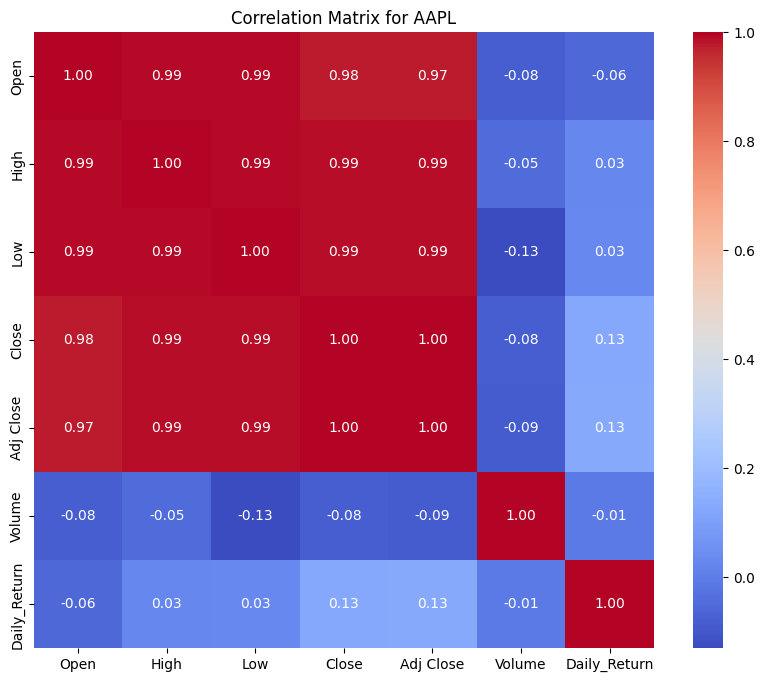

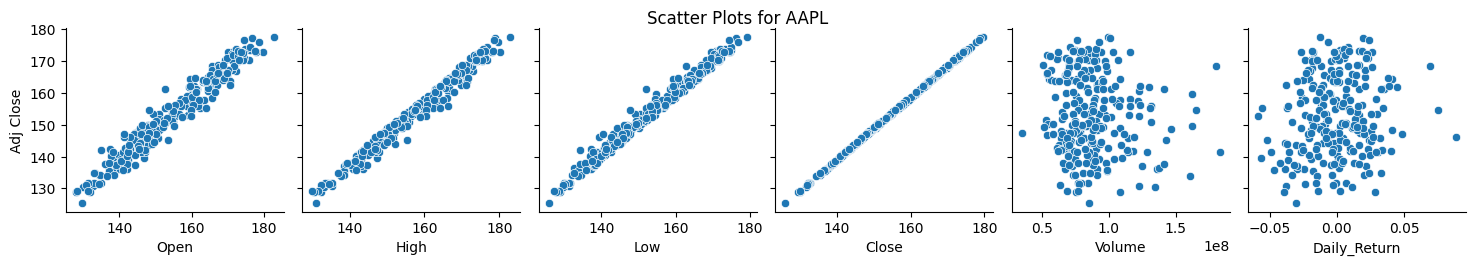

In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock symbol and the date range
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Drop missing values
data = data.dropna()

# Select relevant columns for correlation analysis
selected_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return']
correlation_data = data[selected_columns]

# Create a correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Matrix for {stock_symbol}')
plt.show()

sns.pairplot(data, x_vars=['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return'], y_vars=['Adj Close'])
plt.suptitle(f'Scatter Plots for {stock_symbol}', y=1.02)
plt.show()


In [ ]:
Fcasecas# Install necessary libraries
!pip install yfinance statsmodels

import yfinance as yf
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the stock symbol and the date range
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Drop missing values
data = data.dropna()

# Select relevant columns for VIF analysis
selected_columns = ['Open','High', 'Low', 'Close', 'Volume', 'Adj Close']
vif_data = data[selected_columns]

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Display the VIF values
print("VIF values:")
print(vif)

[*********************100%%**********************]  1 of 1 completed
VIF values:
    Variable            VIF
0       Open   23862.551176
1       High   32425.391847
2        Low   37130.955857
3      Close  349560.405008
4     Volume      24.896046
5  Adj Close  323372.101659


In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Download the data
data = yf.download("AAPL", start="2022-01-01", end="2023-01-01")

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Drop missing values
data = data.dropna()

# Analyze correlations
print("Correlation Matrix:")
print(data[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].corr())

# Based on correlation analysis, select relevant columns (this is an example, you might choose differently)
selected_columns = ['Adj Close', 'Volume']  # Example: choosing Adjusted Close and Volume

# Calculate VIF for the selected variables
vif_data = data[selected_columns]
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Display the VIF values
print("\nVIF values after adjustment:")
print(vif)


[*********************100%%**********************]  1 of 1 completed
Correlation Matrix:
               Open      High       Low     Close    Volume  Adj Close
Open       1.000000  0.991889  0.991279  0.975373 -0.084762   0.974985
High       0.991889  1.000000  0.992234  0.989869 -0.050135   0.989334
Low        0.991279  0.992234  1.000000  0.990556 -0.129840   0.990488
Close      0.975373  0.989869  0.990556  1.000000 -0.083988   0.999860
Volume    -0.084762 -0.050135 -0.129840 -0.083988  1.000000  -0.089825
Adj Close  0.974985  0.989334  0.990488  0.999860 -0.089825   1.000000

VIF values after adjustment:
    Variable        VIF
0  Adj Close  12.903287
1     Volume  12.903287


In [ ]:
# Model For Apple for 5 days

import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the stock symbol and the date range
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Drop missing values
data = data.dropna()

# Define the features and target variable
X = data[['Volume']]
y = data['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Use the model to predict the stock price for the next 5 days
last_date = data.index[-1]
next_dates = pd.date_range(last_date, periods=6, freq='B')[1:]  # Increase periods to 6
next_features = yf.download(stock_symbol, start=last_date, end=next_dates[-1])[['Volume']]
next_predictions = model.predict(next_features)

# Display the predictions for the next 5 days
next_predictions_df = pd.DataFrame({'Predicted_Adj_Close': next_predictions}, index=next_dates[:-1])  # Use [:-1] to match the length
print('\nPredictions for the next 5 days:')
print(next_predictions_df)

# Evaluate the model
r_squared = model.score(X_test, y_test)
print(f'R-squared value: {r_squared}')

# Use the model to predict the stock price for the next 5 days
last_date = data.index[-1]
next_dates = pd.date_range(last_date, periods=6, freq='B')[1:]
next_features = yf.download(stock_symbol, start=last_date, end=next_dates[-1])[['Volume']]
next_predictions = model.predict(next_features)

# Display the predictions for the next 5 days
next_predictions_df = pd.DataFrame({'Predicted_Adj_Close': next_predictions}, index=next_dates[:-1])
print('\nPredictions for the next 5 days:')
print(next_predictions_df)

# Compare predicted and actual stock prices
actual_prices = yf.download(stock_symbol, start=last_date, end=next_dates[-1])['Adj Close']
comparison_df = pd.concat([actual_prices, next_predictions_df], axis=1)
comparison_df.columns = ['Actual_Adj_Close', 'Predicted_Adj_Close']

# Display the comparison
print('\nComparison of Actual and Predicted Stock Prices:')
print(comparison_df)

[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 180.49299542803533
[*********************100%%**********************]  1 of 1 completed

Predictions for the next 5 days:
            Predicted_Adj_Close
2023-01-02           153.820231
2023-01-03           152.854078
2023-01-04           153.487579
2023-01-05           153.712045
R-squared value: 0.017884537126309663
[*********************100%%**********************]  1 of 1 completed

Predictions for the next 5 days:
            Predicted_Adj_Close
2023-01-02           153.820231
2023-01-03           152.854078
2023-01-04           153.487579
2023-01-05           153.712045
[*********************100%%**********************]  1 of 1 completed

Comparison of Actual and Predicted Stock Prices:
            Actual_Adj_Close  Predicted_Adj_Close
2022-12-30        129.207779                  NaN
2023-01-02               NaN           153.820231
2023-01-03        124.374794           152.854078
2023-01-0

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# List of stock symbols
stock_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

# Define the date range
start_date = "2020-01-01"
end_date = "2023-01-01"

# Function to perform linear regression and make predictions
def predict_stock_prices(stock_symbol):
    # Download the data
    data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Calculate daily returns
    data['Daily_Return'] = data['Adj Close'].pct_change()

    # Drop missing values
    data = data.dropna()

    # Define the features and target variable
    X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    y = data['Adj Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for {stock_symbol}: {mse}')

    # Use the model to predict the stock price for the next 10 days
    last_date = data.index[-1]
    next_dates = pd.date_range(last_date, periods=11, freq='B')[1:]
    next_features = yf.download(stock_symbol, start=last_date, end=next_dates[-1])[['Open', 'High', 'Low', 'Close', 'Volume']]
    next_predictions = model.predict(next_features)

    # Display the predictions for the next 10 days
    next_predictions_df = pd.DataFrame({'Predicted_Adj_Close': next_predictions}, index=next_dates[:-1])
    print(f'\nPredictions for the next 10 days ({stock_symbol}):')
    print(next_predictions_df)

    # Compare predicted and actual stock prices
    actual_prices = yf.download(stock_symbol, start=last_date, end=next_dates[-1])['Adj Close']
    comparison_df = pd.concat([actual_prices, next_predictions_df], axis=1)
    comparison_df.columns = ['Actual_Adj_Close', 'Predicted_Adj_Close']

    # Display the comparison
    print(f'\nComparison of Actual and Predicted Stock Prices ({stock_symbol}):')
    print(comparison_df)

# Loop through the list of stock symbols
for symbol in stock_symbols:
    predict_stock_prices(symbol)


[*********************100%%**********************]  1 of 1 completed
Mean Squared Error for AAPL: 0.13975510959555934
[*********************100%%**********************]  1 of 1 completed

Predictions for the next 10 days (AAPL):
            Predicted_Adj_Close
2023-01-02           128.180596
2023-01-03           123.661763
2023-01-04           124.730098
2023-01-05           123.368289
2023-01-06           128.106397
2023-01-09           128.622369
2023-01-10           129.058826
2023-01-11           131.805917
2023-01-12           131.688722
[*********************100%%**********************]  1 of 1 completed

Comparison of Actual and Predicted Stock Prices (AAPL):
            Actual_Adj_Close  Predicted_Adj_Close
2022-12-30        129.207794                  NaN
2023-01-02               NaN           128.180596
2023-01-03        124.374794           123.661763
2023-01-04        125.657639           124.730098
2023-01-05        124.325073           123.368289
2023-01-06        128.899

# Random Forest Model

In [ ]:
import warnings
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# Define the stock symbol and the date range
stock_symbol = "AAPL"
start_date = "2015-01-01"
end_date = "2023-01-01"

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Drop missing values
data = data.dropna()

# Define the features and target variable
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 4, 6]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=25, bootstrap=True), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params, "\n")

# Initialize and fit the Random Forest Regressor with the best parameters
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores, "\n")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)
print(f'Mean Squared Error: {mse}\n')
print(f'R-Squared Value: {r_squared}\n')

# Predict the stock price for the next 5 days
last_date = data.index[-1]
next_dates = pd.date_range(last_date, periods=6, freq='B')[1:]  # Increase periods to 6
next_features = yf.download(stock_symbol, start=last_date, end=next_dates[-1])[['Open', 'High', 'Low', 'Close', 'Volume']]
next_predictions = model.predict(next_features)

# Display the predictions for the next 5 days
next_predictions_df = pd.DataFrame({'Predicted_Adj_Close': next_predictions}, index=next_dates[:-1])  # Use [:-1] to match the length
print('\nPredictions for the next 5 days:')
print(next_predictions_df)

# Compare predicted and actual stock prices
actual_prices = yf.download(stock_symbol, start=last_date, end=next_dates[-1])['Adj Close']
comparison_df = pd.concat([actual_prices, next_predictions_df], axis=1)
comparison_df.columns = ['Actual_Adj_Close', 'Predicted_Adj_Close']

# Display the comparison
print('\nComparison of Actual and Predicted Stock Prices:')
print(comparison_df)

[*********************100%%**********************]  1 of 1 completed

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100} 

Cross-Validation Scores: [0.99992258 0.99993933 0.99994137 0.99994035 0.99991734] 

Mean Squared Error: 0.13125977889694318

R-Squared Value: 0.9999444573929337

[*********************100%%**********************]  1 of 1 completed

Predictions for the next 5 days:
            Predicted_Adj_Close
2023-01-02           128.776720
2023-01-03           123.183393
2023-01-04           124.662727
2023-01-05           122.993001
[*********************100%%**********************]  1 of 1 completed

Comparison of Actual and Predicted Stock Prices:
            Actual_Adj_Close  Predicted_Adj_Close
2022-12-30        129.207794                  NaN
2023-01-02               NaN           128.776720
2023-01-03        124.374802           123.183393
2023-01-04        125.657639           124.662727
2023-01-05        124.325081           122.993001


In [ ]:
import warnings
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# List of stock symbols
stock_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

# Define the date range
start_date = "2015-01-01"
end_date = "2023-01-01"

# Function to perform random forest regression and make predictions
def predict_stock_prices_rf(stock_symbol):
    # Download the data
    data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Calculate daily returns
    data['Daily_Return'] = data['Adj Close'].pct_change()

    # Drop missing values
    data = data.dropna()

    # Define the features and target variable
    X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    y = data['Adj Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Hyperparameter Tuning using Grid Search
    param_grid = {
        'n_estimators': [10, 50, 100],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 4, 6]
    }

    grid_search = GridSearchCV(RandomForestRegressor(random_state=42, bootstrap=True), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Display the best parameters
    best_params = grid_search.best_params_
    print("\nBest Parameters:", best_params, "\n")

    # Initialize and fit the Random Forest Regressor with the best parameters
    model = RandomForestRegressor(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-Validation Scores:", cv_scores, "\n")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}\n')

    # Evaluate the model
    r_squared = model.score(X_test, y_test)
    print(f'R-Squared Value: {r_squared}\n')

    # Use the model to predict the stock price for the next 10 days
    last_date = data.index[-1]
    next_dates = pd.date_range(last_date, periods=11, freq='B')[1:]
    next_features = yf.download(stock_symbol, start=last_date, end=next_dates[-1])[['Open', 'High', 'Low', 'Close', 'Volume']]
    next_predictions = model.predict(next_features)

    # Display the predictions for the next 10 days
    next_predictions_df = pd.DataFrame({'Predicted_Adj_Close': next_predictions}, index=next_dates[:-1])
    print(f'\nPredictions for the next 10 days ({stock_symbol}):')
    print(next_predictions_df)

    # Compare predicted and actual stock prices
    actual_prices = yf.download(stock_symbol, start=last_date, end=next_dates[-1])['Adj Close']
    comparison_df = pd.concat([actual_prices, next_predictions_df], axis=1)
    comparison_df.columns = ['Actual_Adj_Close', 'Predicted_Adj_Close']

    # Display the comparison
    print(f'\nComparison of Actual and Predicted Stock Prices ({stock_symbol}):')
    print(comparison_df)

# Loop through the list of stock symbols
for symbol in stock_symbols:
    predict_stock_prices_rf(symbol)

[*********************100%%**********************]  1 of 1 completed

Best Parameters: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100} 

Cross-Validation Scores: [0.99992222 0.99993958 0.99994296 0.99994161 0.99991615] 

Mean Squared Error: 0.13617027539984966

R-Squared Value: 0.9999423795151553

[*********************100%%**********************]  1 of 1 completed

Predictions for the next 10 days (AAPL):
            Predicted_Adj_Close
2023-01-02           128.731661
2023-01-03           123.208343
2023-01-04           124.646943
2023-01-05           122.980330
2023-01-06           128.038307
2023-01-09           128.741852
2023-01-10           128.535957
2023-01-11           131.128563
2023-01-12           131.441999
[*********************100%%**********************]  1 of 1 completed

Comparison of Actual and Predicted Stock Prices (AAPL):
            Actual_Adj_Close  Predicted_Adj_Close
2022-12-30        129.207794                  NaN
2023-01-02               NaN 

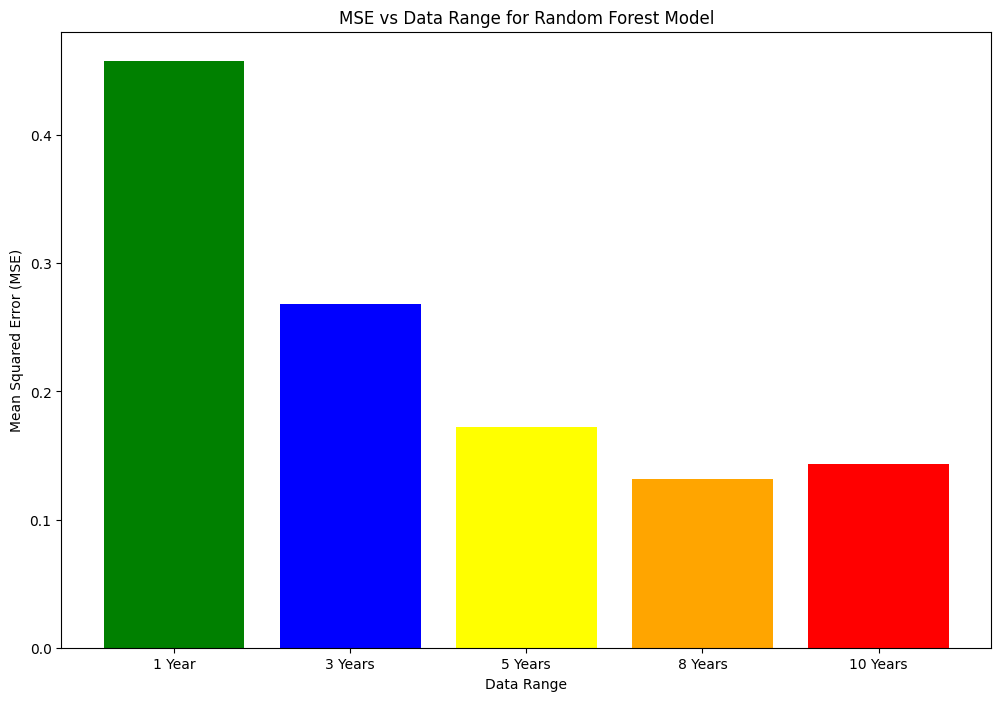

In [ ]:
import matplotlib.pyplot as plt

# Updated data ranges and corresponding MSEs with exact values
data_ranges = ['1 Year', '3 Years', '5 Years', '8 Years', '10 Years']
mses = [0.45792314613029617, 0.26850583394916777, 0.17246432084242336, 0.1313638743949995, 0.1435518754527404]
colors = ['green', 'blue', 'yellow', 'orange', 'red']

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(data_ranges, mses, color=colors)

# Adding title and labels
plt.title('MSE vs Data Range for Random Forest Model')
plt.xlabel('Data Range')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(data_ranges)

# Show the plot
plt.show()

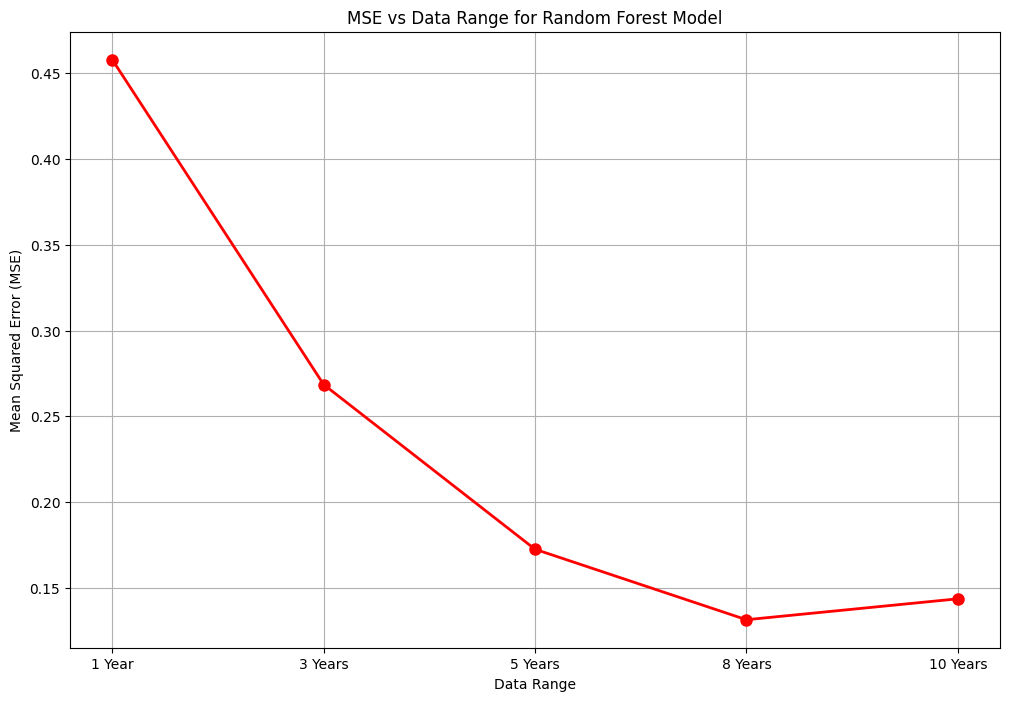

In [ ]:
# Create a line graph
plt.figure(figsize = (12, 8))
plt.plot(data_ranges, mses, marker = 'o', color = 'red', linestyle = '-', linewidth = 2, markersize = 8)

# Adding title and labels
plt.title('MSE vs Data Range for Random Forest Model')
plt.xlabel('Data Range')
plt.ylabel('Mean Squared Error (MSE)')

# Show the plot
plt.grid(True)
plt.show()

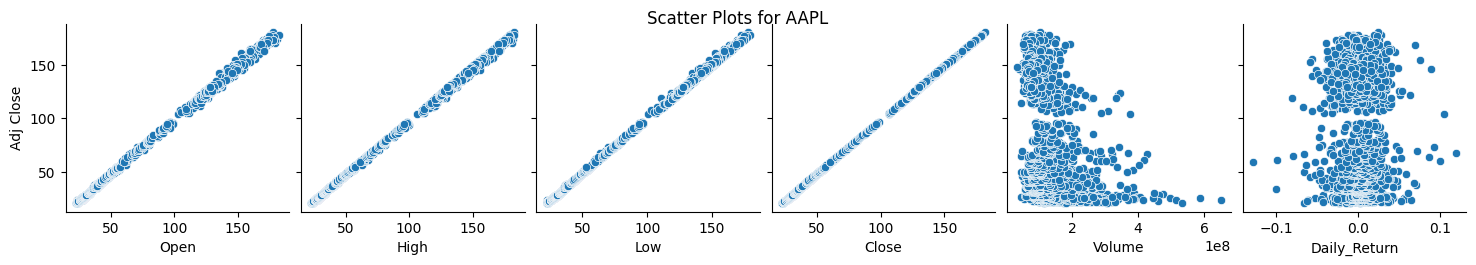

In [ ]:
sns.pairplot(data, x_vars=['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return'], y_vars=['Adj Close'])
plt.suptitle(f'Scatter Plots for {stock_symbol}', y=1.02)
plt.show()

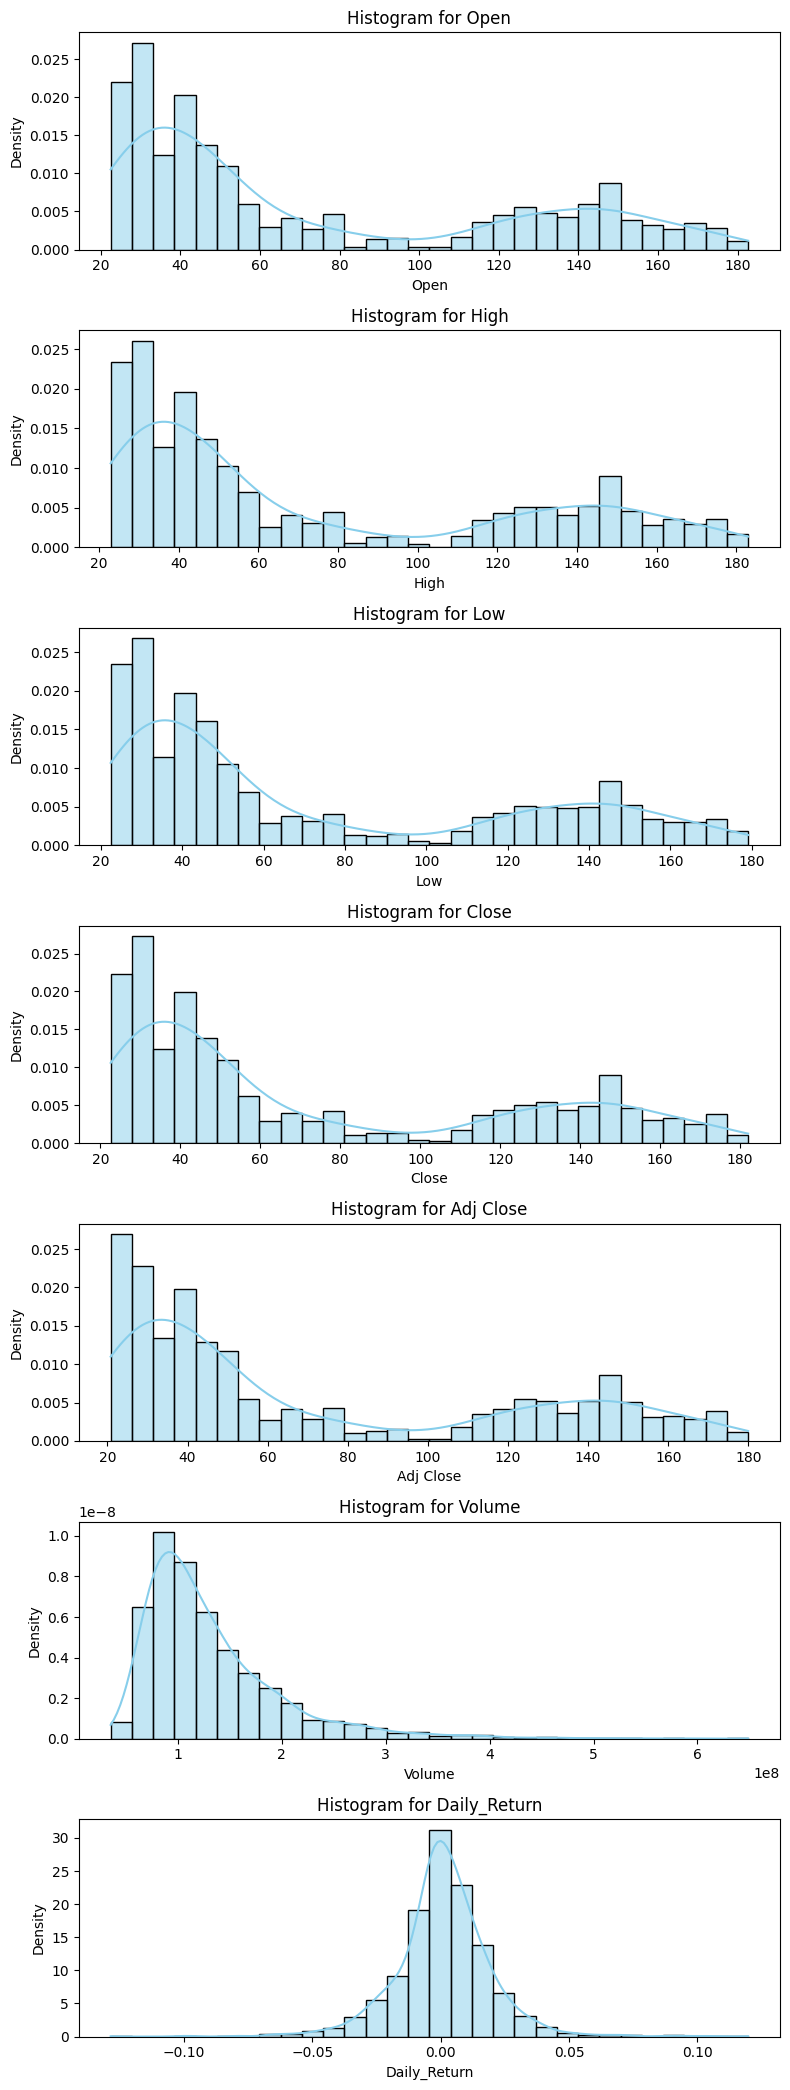

In [ ]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(8, 3 * len(data.columns)))

# Create histograms for each variable
for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i], kde=True, bins=30, color='skyblue', stat="density")
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

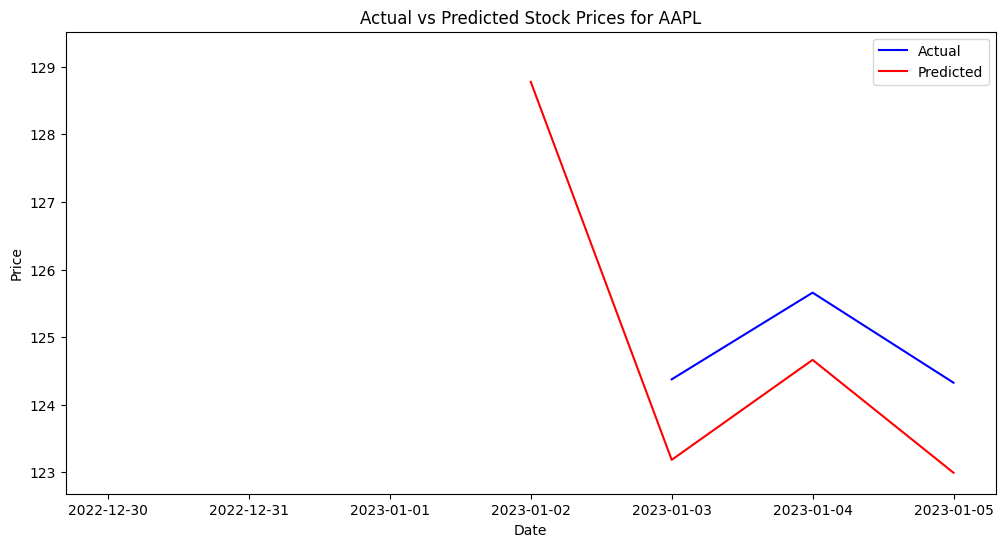

In [ ]:
# Ensure this part is executed after the Random Forest predictions
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual_Adj_Close'], label='Actual', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted_Adj_Close'], label='Predicted', color='red')
plt.title(f'Actual vs Predicted Stock Prices for {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

14/14 [==============================] - 0s 14ms/step
Fold 1, Training RMSE: 0.020621129409345657, Validation RMSE: 0.02061792856684369
14/14 [==============================] - 0s 13ms/step
Fold 2, Training RMSE: 0.025702538374916716, Validation RMSE: 0.026689767369017993
14/14 [==============================] - 0s 12ms/step
Fold 3, Training RMSE: 0.021622312143111482, Validation RMSE: 0.02070687903655471
14/14 [==============================] - 0s 14ms/step
Fold 4, Training RMSE: 0.02124361393244509, Validation RMSE: 0.02140144891834189
14/14 [==============================] - 0s 13ms/step
Fold 5, Training RMSE: 0.02085345087804294, Validation RMSE: 0.02196650760898247
1/1 [==============================] - 0s 25ms/step


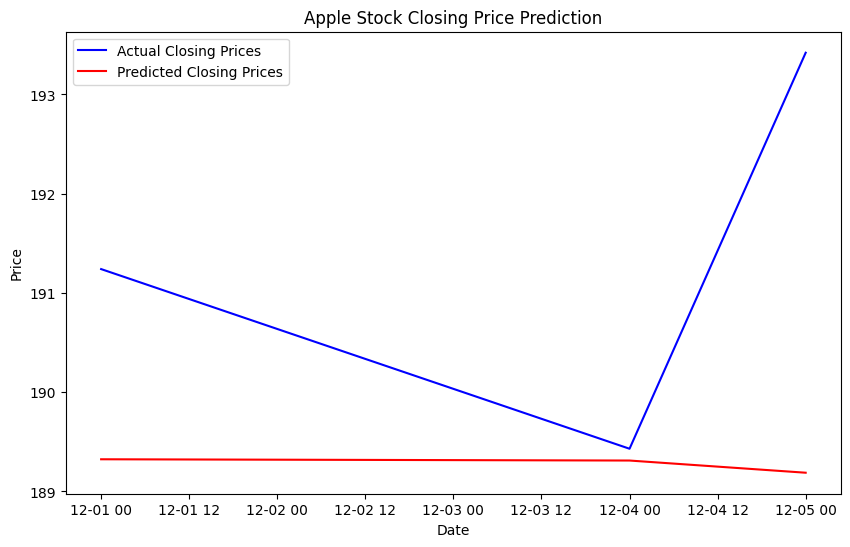

In [ ]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Fetch historical stock data for Apple
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = (datetime.now() - timedelta(6)).strftime('%Y-%m-%d')  # 5 days ago

aapl = yf.Ticker(ticker)
data = aapl.history(start=start_date, end=end_date)

# Preprocess the data
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create a supervised learning problem
time_step = 60
X, y = [], []
for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i-time_step:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold_no = 1
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dropout(0.3))
    model.add(LSTM(units=30, kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define Early Stopping and Learning Rate Reduction Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

    # Evaluate the model's performance
    train_predict = model.predict(X_train)
    val_predict = model.predict(X_val)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predict))

    print(f'Fold {fold_no}, Training RMSE: {train_rmse}, Validation RMSE: {val_rmse}')
    fold_no += 1


# Predict prices for the next 5 days
last_60_days = scaled_data[-60:]
next_5_days = []
for _ in range(5):
    last_60_days_input = last_60_days.reshape((1, time_step, 1))
    next_day_price = model.predict(last_60_days_input)
    next_5_days.append(next_day_price[0, 0])
    last_60_days = np.append(last_60_days, next_day_price)
    last_60_days = last_60_days[1:]

predicted_prices = scaler.inverse_transform(np.array(next_5_days).reshape(-1, 1))

# Fetch actual prices for the last 5 days
actual_start_date = (datetime.now() - timedelta(5)).strftime('%Y-%m-%d')
actual_end_date = datetime.now().strftime('%Y-%m-%d')

actual_data = aapl.history(start=actual_start_date, end=actual_end_date)
actual_prices = actual_data['Close'].values
actual_dates = actual_data.index  # Get the actual dates

# Truncate or extend the predicted prices to match the actual prices
predicted_prices = np.resize(predicted_prices, actual_prices.shape)

plt.figure(figsize=(10, 6))
plt.plot(actual_dates, actual_prices, color='blue', label='Actual Closing Prices')
plt.plot(actual_dates, predicted_prices, color='red', label='Predicted Closing Prices')
plt.title('Apple Stock Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()